In [254]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import datasets
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression

Upload the file 'Country-data.csv' in the files section.

In [255]:
data = pd.read_csv('https://pastebin.com/raw/rtDiipTp')

In [256]:
data

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


Perform PCA with 2 principal components. Be sure to scale the data using StandardScaler first. 5

In [257]:
from sklearn.preprocessing import StandardScaler

In [258]:
Xdemo=data.drop('country',axis=1)
ydemo=data['country']

In [259]:
print(Xdemo.mean(), '\n', Xdemo.var())

child_mort       38.270060
exports          41.108976
health            6.815689
imports          46.890215
income        17144.688623
inflation         7.781832
life_expec       70.555689
total_fer         2.947964
gdpp          12964.155689
dtype: float64 
 child_mort    1.626423e+03
exports       7.514183e+02
health        7.545116e+00
imports       5.861042e+02
income        3.716439e+08
inflation     1.117398e+02
life_expec    7.908851e+01
total_fer     2.291734e+00
gdpp          3.359414e+08
dtype: float64


In [260]:
Xdemo_scaled=StandardScaler().fit_transform(Xdemo)

In [261]:
from sklearn.decomposition import PCA

In [262]:
pca = PCA(2).fit_transform(Xdemo_scaled)

In [263]:
temp=PCA(2).fit(Xdemo_scaled)

Perform PCA with 2 principal components. Be sure to scale the data using StandardScaler first. 5

In [264]:
temp.components_

array([[-0.41951945,  0.28389698,  0.15083782,  0.16148244,  0.39844111,
        -0.19317293,  0.42583938, -0.40372896,  0.39264482],
       [ 0.19288394,  0.61316349, -0.24308678,  0.67182064,  0.02253553,
        -0.00840447, -0.22270674,  0.15523311, -0.0460224 ]])

In [265]:
Xdemo.columns

Index(['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

**It can be interpreted that life_expectency will akways be negative and import and exports will always be positive.**

3. How much of the variance in the data is explained by the first 2 principal components.

In [291]:
print(temp.explained_variance_ratio_)

[0.46183166 0.17284422]


0.46 to .17% of the variance in the data is explained by the first 2 principal components

Following the USA crime example in the notebook from class, see if you can plot the countries using the coordinates of their first two principal components. Does this make sense given your interpretation above? Does anything stand out? (Hint: The plot is a bit crowded with the text beside each point. It may be helpful to make a few plots with only 50 or so countries at a time to make it more readable.) 5 

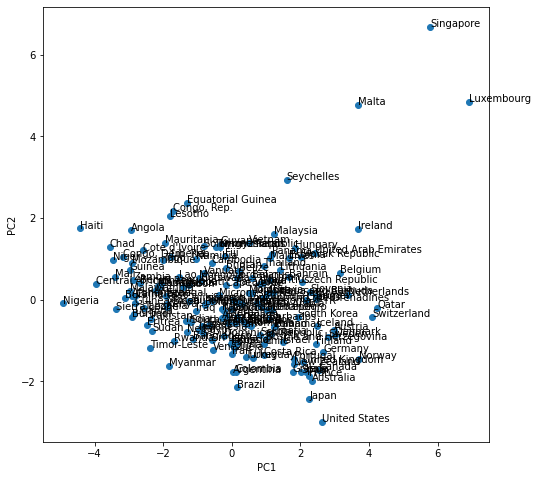

In [289]:
fig, ax = plt.subplots(figsize=(8,8))
xx=pca[:,0]
yy=pca[:,1]
ax.scatter(xx,yy)
plt.xlabel('PC1')
plt.ylabel('PC2')
for i,txt in enumerate(ydemo):
    ax.annotate(txt, (xx[i], yy[i]))
plt.show()

In [267]:
a = pca[:50]

In [268]:
Xdemo50=data.drop('country',axis=1)[:50]
ydemo50=data['country'][:50]

In [269]:
print(Xdemo50.mean(), '\n', Xdemo.var())

child_mort       42.41400
exports          38.29040
health            6.63000
imports          42.01600
income        15729.82000
inflation         7.02764
life_expec       70.54600
total_fer         2.99880
gdpp          11585.34000
dtype: float64 
 child_mort    1.626423e+03
exports       7.514183e+02
health        7.545116e+00
imports       5.861042e+02
income        3.716439e+08
inflation     1.117398e+02
life_expec    7.908851e+01
total_fer     2.291734e+00
gdpp          3.359414e+08
dtype: float64


In [270]:
Xdemo50_scaled=StandardScaler().fit_transform(Xdemo50)

In [271]:
pca_50 = PCA(2).fit_transform(Xdemo50_scaled)

In [272]:
temp=PCA(2).fit(Xdemo50_scaled)

In [273]:
a = pca_50[:50]

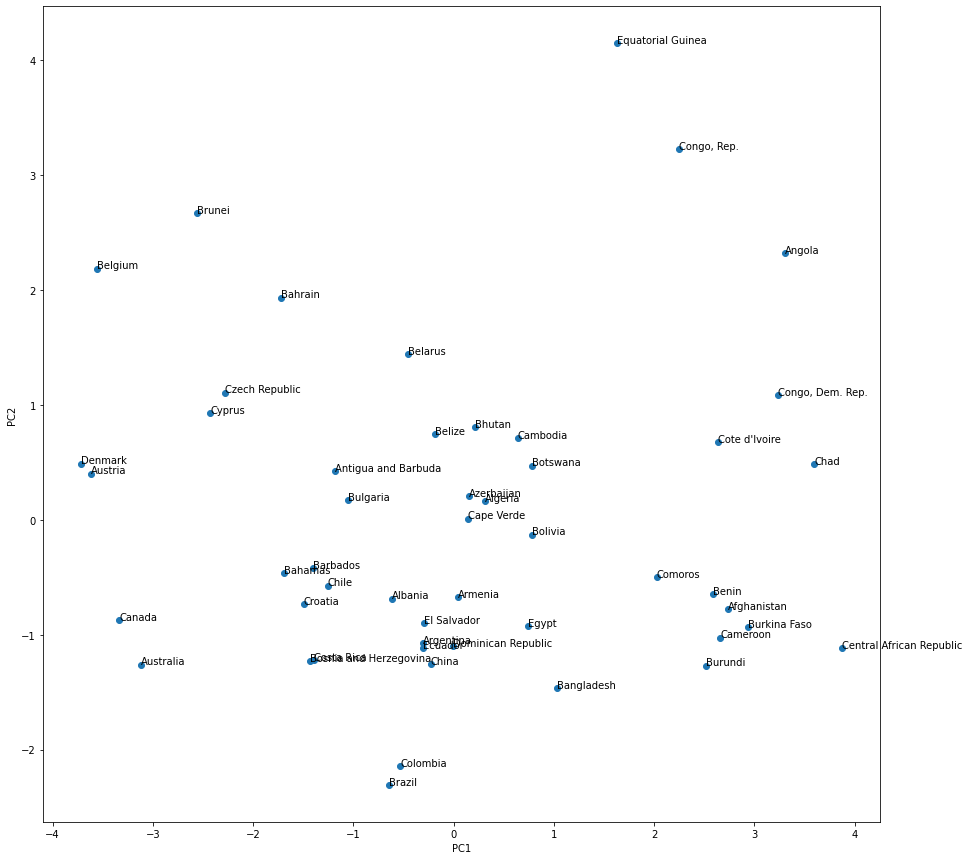

In [274]:
fig, ax = plt.subplots(figsize=(15,15))
xx=a[:,0]
yy=a[:,1]
ax.scatter(xx,yy)
plt.xlabel('PC1')
plt.ylabel('PC2')
for i,txt in enumerate(ydemo50):
    ax.annotate(txt, (xx[i], yy[i]))
plt.show()

In [275]:
Xdemo51=data.drop('country',axis=1)[50:101]
ydemo51=data['country'][50:101]

In [276]:
print(Xdemo51.mean(), '\n', Xdemo.var())

child_mort       39.288235
exports          44.988039
health            6.793333
imports          53.111765
income        17292.745098
inflation         6.395627
life_expec       69.962745
total_fer         2.915098
gdpp          13661.862745
dtype: float64 
 child_mort    1.626423e+03
exports       7.514183e+02
health        7.545116e+00
imports       5.861042e+02
income        3.716439e+08
inflation     1.117398e+02
life_expec    7.908851e+01
total_fer     2.291734e+00
gdpp          3.359414e+08
dtype: float64


In [277]:
Xdemo51_scaled=StandardScaler().fit_transform(Xdemo51)

In [278]:
pca_51 = PCA(2).fit_transform(Xdemo51_scaled)

In [279]:
temp=PCA(2).fit(Xdemo51_scaled)

In [280]:
b = pca_51[:100]

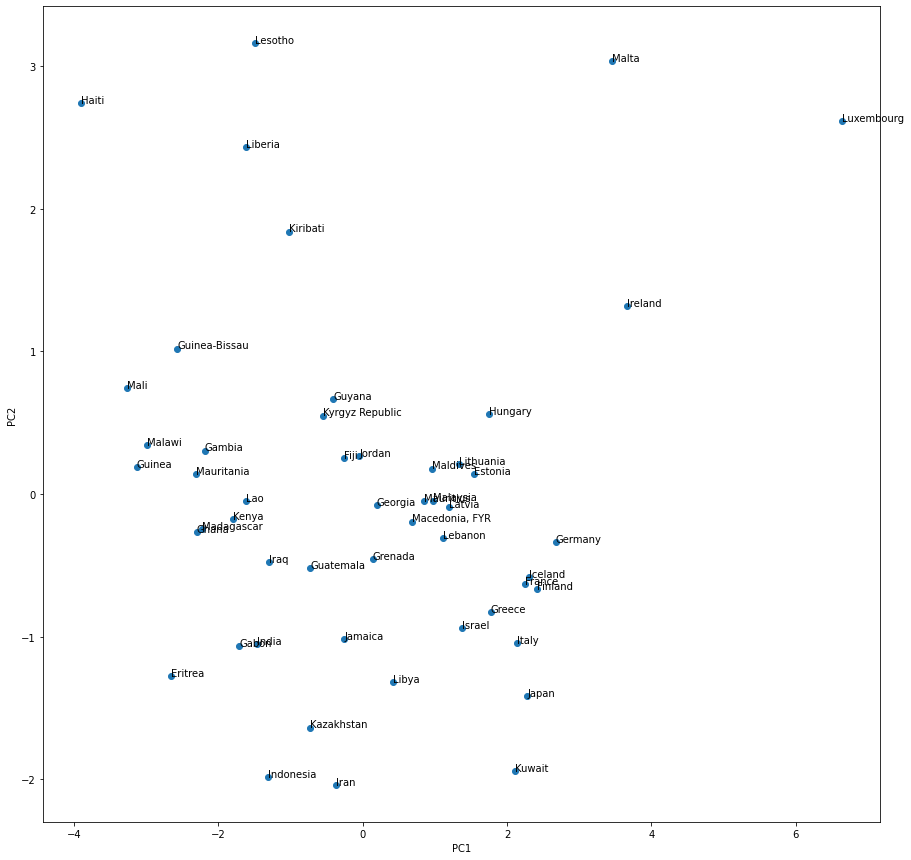

In [281]:
fig, ax = plt.subplots(figsize=(15,15))
xx51=b[:,0]
yy51=b[:,1]
ax.scatter(xx51,yy51)
plt.xlabel('PC1')
plt.ylabel('PC2')
for i,txt in enumerate(ydemo51):
    ax.annotate(txt, (xx51[i], yy51[i]))
plt.show()


In [282]:
Xdemo67=data.drop('country',axis=1)[101:]
ydemo67=data['country'][101:]

In [283]:
print(Xdemo67.mean(), '\n', Xdemo67.var())

child_mort       34.343939
exports          40.246803
health            6.973636
imports          45.775241
income        18102.151515
inflation         9.424348
life_expec       71.021212
total_fer         2.934848
gdpp          13469.575758
dtype: float64 
 child_mort    1.229790e+03
exports       8.133952e+02
health        9.735657e+00
imports       6.586658e+02
income        4.812618e+08
inflation     2.199600e+02
life_expec    6.444539e+01
total_fer     2.263176e+00
gdpp          3.817933e+08
dtype: float64


In [284]:
Xdemo67_scaled=StandardScaler().fit_transform(Xdemo67)

In [285]:
pca_67 = PCA(2).fit_transform(Xdemo67_scaled)

In [286]:
temp=PCA(2).fit(Xdemo67_scaled)

In [287]:
c = pca_67[:]

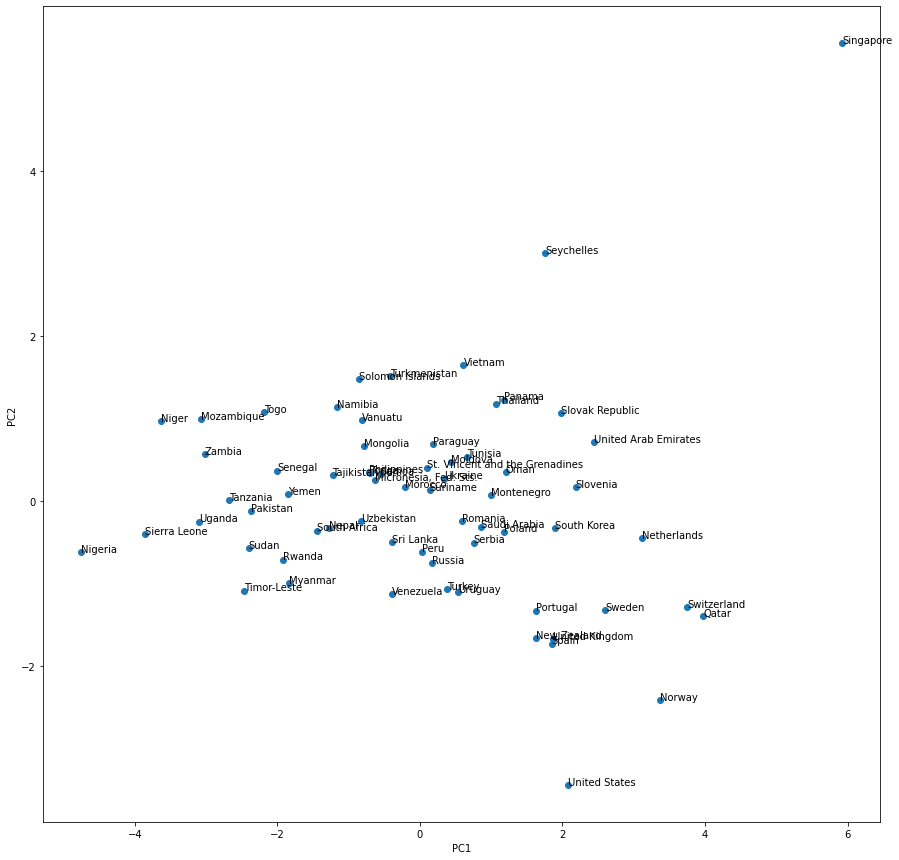

In [288]:
from numpy.ma.core import shape
fig, ax = plt.subplots(figsize=(15,15))
xx=c[:,0]
yy=c[:,1]
ax.scatter(xx,yy)
plt.xlabel('PC1')
plt.ylabel('PC2')
for i,txt in enumerate(ydemo67):
    ax.annotate(txt, (xx[i], yy[i]))
plt.show()

Looking at the outliers it does make sense to conclude what is said above.